In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sales = pd.read_csv('sales(in).csv')
sales

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 678.1+ KB


In [8]:
sales = sales[['W1', 'Normalized 1']]

In [9]:
sales

,W1,Normalized 1
0,12,0.50
1,6,0.60
2,11,0.73
3,8,0.35
4,5,0.13
...,...,...
806,0,0.00
807,1,0.14
808,0,0.00
809,0,0.00


Text(0.5, 0, 'W1')

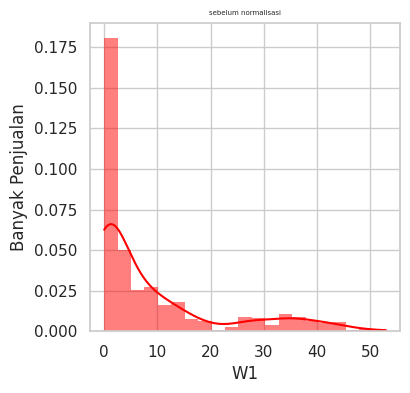

In [20]:
plt.figure(figsize = (4, 4))
sns.set(style = 'whitegrid')
sns.histplot(sales['W1'],
             color = 'red', kde = True, stat = 'density', linewidth = 0)
plt.title('sebelum normalisasi', fontsize = 5)
plt.ylabel('Banyak penjualan')
plt.xlabel('W1')

Text(0.5, 0, 'Angka normalisasi')

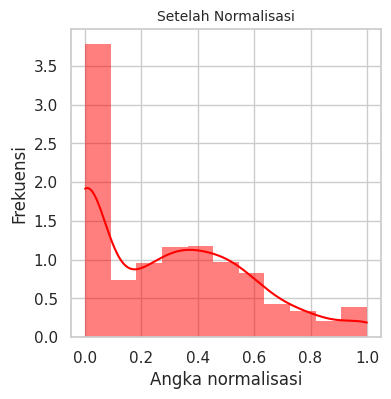

In [22]:
plt.figure(figsize = (4,4))
sns.set(style = 'whitegrid')
sns.histplot(sales['Normalized 1'], color = 'red', kde = True, stat = 'density', linewidth = 0)
plt.title('Setelah Normalisasi', fontsize = 10)
plt.ylabel('Frekuensi')
plt.xlabel('Angka normalisasi')

<function matplotlib.pyplot.show(close=None, block=None)>

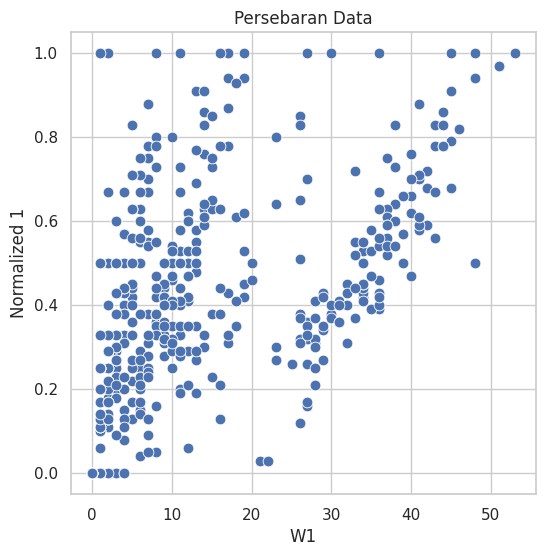

In [12]:
#persebaran data
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'W1', y = 'Normalized 1', data = sales, s = 60)
plt.title('Persebaran Data')
plt.show

In [13]:
from sklearn.cluster import KMeans

wcss = []
for i in range (1, 11):
    kmModel = KMeans(n_clusters = i, n_init = 10)
    kmModel.fit(sales)
    wcss.append(kmModel.inertia_)

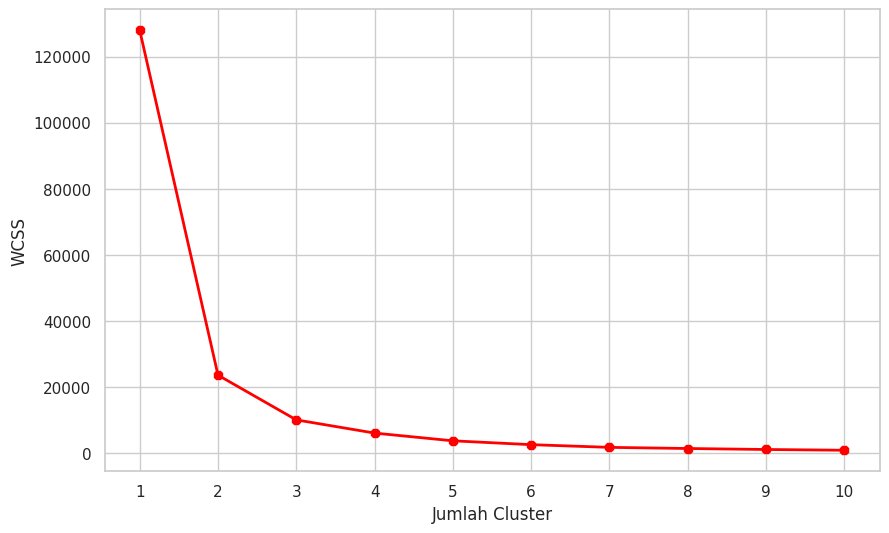

In [14]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel("Jumlah Cluster")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.show()

In [15]:
kmModelFix = KMeans(n_clusters = 5, n_init = 10)
kmModelFix.fit(sales)

hasil_prediksi = kmModelFix.predict(sales)
print(hasil_prediksi)

[3 0 0 0 0 2 0 0 0 3 0 2 0 3 1 4 1 1 4 3 0 3 0 1 4 3 4 4 0 1 3 3 3 1 1 4 1
 1 3 4 4 4 1 4 4 1 1 1 4 2 3 1 0 1 4 4 4 4 3 1 4 4 1 1 0 1 4 0 1 1 0 4 4 0
 1 4 0 1 4 4 0 3 1 4 4 4 1 4 4 4 0 1 0 0 3 4 1 2 0 0 1 1 0 2 2 0 3 2 0 3 2
 1 4 0 0 0 2 3 1 4 0 0 0 0 0 0 2 1 1 1 4 1 1 1 4 1 1 1 1 1 1 4 4 3 3 3 2 2
 0 2 0 0 0 3 0 2 0 2 2 0 0 0 0 0 3 0 1 4 4 1 0 1 4 1 1 1 1 4 1 1 1 4 1 1 4
 4 1 4 4 1 1 4 3 1 2 4 0 3 2 3 2 0 0 2 0 2 0 4 0 3 3 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 4 3 3 2 0 3 3 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 2 2 2 2 2 0 2 3 0 0
 2 0 0 0 2 2 0 0 0 2 0 2 0 2 0 2 2 3 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 3 0
 3 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 3 0 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 3 0 0 0 2 0 0 3 3 4 0 1
 3 3 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 3 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 0 0 4 0 0 0 0 3 3 0 3 3 

In [16]:
sales['Label'] = hasil_prediksi
sales.head()

<ipython-input-16-344d270dbfa6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Label'] = hasil_prediksi


,W1,Normalized 1,Label
0,12,0.50,3
1,6,0.60,0
2,11,0.73,0
3,8,0.35,0
4,5,0.13,0


<ipython-input-17-f2533ecf60c5>:2: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = 'W1', y = 'Normalized 1', hue = 'Label', palette = ['green','red'],


<function matplotlib.pyplot.show(close=None, block=None)>

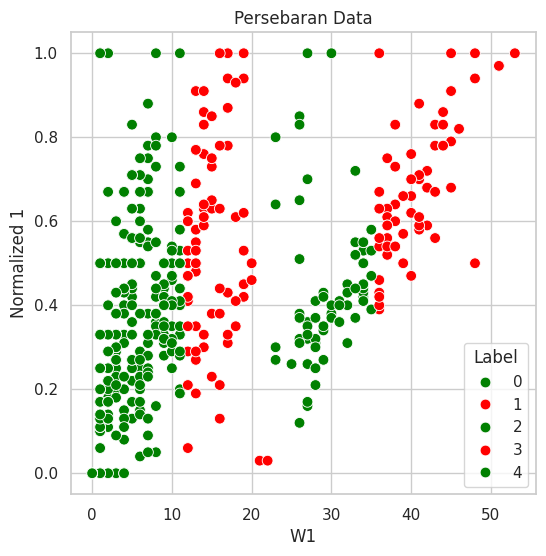

In [17]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'W1', y = 'Normalized 1', hue = 'Label', palette = ['green','red'],
                legend = 'full', data = sales, s = 60)
plt.title('Persebaran Data')
plt.show